## Jacobian Calculations from am modeling software

In this nb we are looking at the Jacobian for T_rj. Below is an equation taken from the handbook stating "The Nscale statement applies a scale factor x to SECTION 8.2.1 AN EXAMPLE FROM WATER VAPOR RADIOMETRY 141 the tropospheric part of this profile, and our differentiation variable is this scale factor, not the total water vapor column density itself. That is, we're computing ∂T_R−J /∂x and not ∂T_R−J /∂ N_H2O . The relationship between the two is:

$\frac{\delta T_{rj}}{\delta N_{H20}}=(\frac{\delta N_{H20}}{\delta x})^{-1} * \frac{\delta T_{rj}}{\delta x} = \frac{1}{N_{0}} * \frac{\delta T_{rj}}{\delta x}$

where N_0 is the unscaled median tropospheric column density at x=1 . As documented in the listing of Example 2.5, N 0=1.86 precipitable millimeters. (We could also have found this by examining the column density summaries in the stderr output after a run with x=1 .)

In [52]:
##### import matplotlib.pyplot as plt
#edit
import numpy as np
import matplotlib.scale as scale
import matplotlib.pyplot as plt
import yaml
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import sys
sys.path.insert(0,"/Users/jillg/code/CMB_s4/Atmos/Atmos_pwv_flucts")
#from Atmos_pwv_funcs import *

%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [8, 6]

In [53]:
!ls Atmos_pwv_flucts

ACT_900pwv_wjacob_tb.txt      Jacobians_am.ipynb
Atacama_1000u_50deg.txt       LICENSE
Atacama_1000um_wjacobian.txt  Pole_300u_50deg.txt
Atacama_1000um_wojacobian.txt Pole_400u_50deg.txt
Atacama_900u_50deg.txt        README.md
Atacama_900um_wjacobian.txt   SPole_300um_wojacobian.txt
Atacama_900um_wojacobian.txt  SPole_400um_wojacobian.txt
Atmos_pwv_flucts.ipynb        __pycache__
Atmos_pwv_funcs.py            channels.yaml


In [90]:
#Read in --wjacobian.txt file here:

#ACT am files
a900 = np.loadtxt('Atmos_pwv_flucts/Atacama_900um_wjacobian.txt', unpack=True)
a1000 = np.loadtxt('Atmos_pwv_flucts/Atacama_1000um_wjacobian.txt',unpack=True)

#SPole am files
sp300 = np.loadtxt('Atmos_pwv_flucts/SPole_300um_wjacobian.txt',unpack=True)
sp400 = np.loadtxt('Atmos_pwv_flucts/SPole_400um_wjacobian.txt',unpack=True)


Text(0.5, 0.98, 'Atacama')

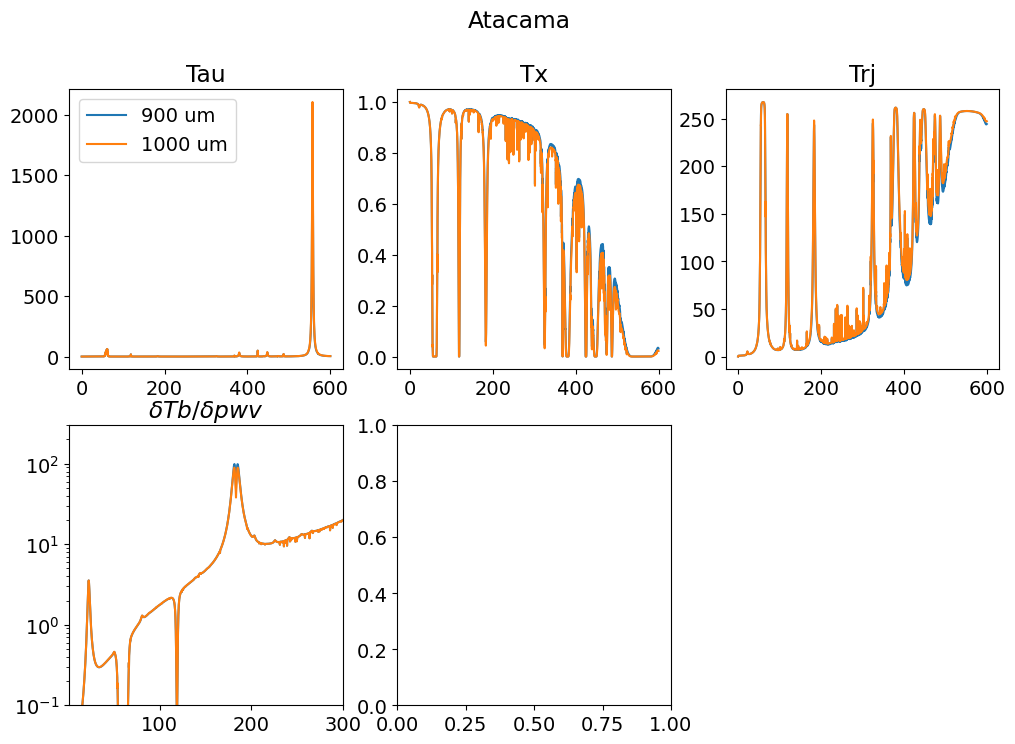

In [89]:
#this will be necessary when the Jacobian is incorporated
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 8]

#figure.set_constrained_layout_pads(w_pad=5 / 72, h_pad=2 / 72, hspace=0.5,
                               # wspace=1.0)

act_freq=a900[0]

plt.subplot(2,3,1)
plt.plot(act_freq, a900[1], label='900 um') #tau neper
plt.plot(act_freq, a1000[1], label='1000 um')
plt.title('Tau')
plt.legend()

plt.subplot(2,3,2)
plt.plot(act_freq, a900[2]) #transmittance
plt.plot(act_freq, a1000[2])
plt.title('Tx')

plt.subplot(2,3,3)
plt.plot(act_freq, a900[3]) #trj K
plt.plot(act_freq, a1000[3])
plt.title('Trj')

plt.subplot(2,3,4)
plt.semilogy(act_freq, a900[4]) # delta Tb / delta pwv (K/mm?)
plt.semilogy(act_freq, a1000[4])
plt.ylim(0.1, 300)
plt.xlim(1, 300)
plt.title('$\delta Tb/ \delta pwv$')
#plt.legend()

plt.subplot(2,3,5)
#plt.plot(act_freq, a900[5]) #? Jacobian of Trj
#plt.plot(act_freq, a1000[5])
#plt.title('Jacobian')

#plt.subplot(2,3,6)
#plt.plot(act_freq, a1000[3])
#plt.plot(act_freq, a1000[5])
#plt.title('Trj & Jacobian')
plt.suptitle('Atacama')

Text(0.5, 0.98, 'Pole')

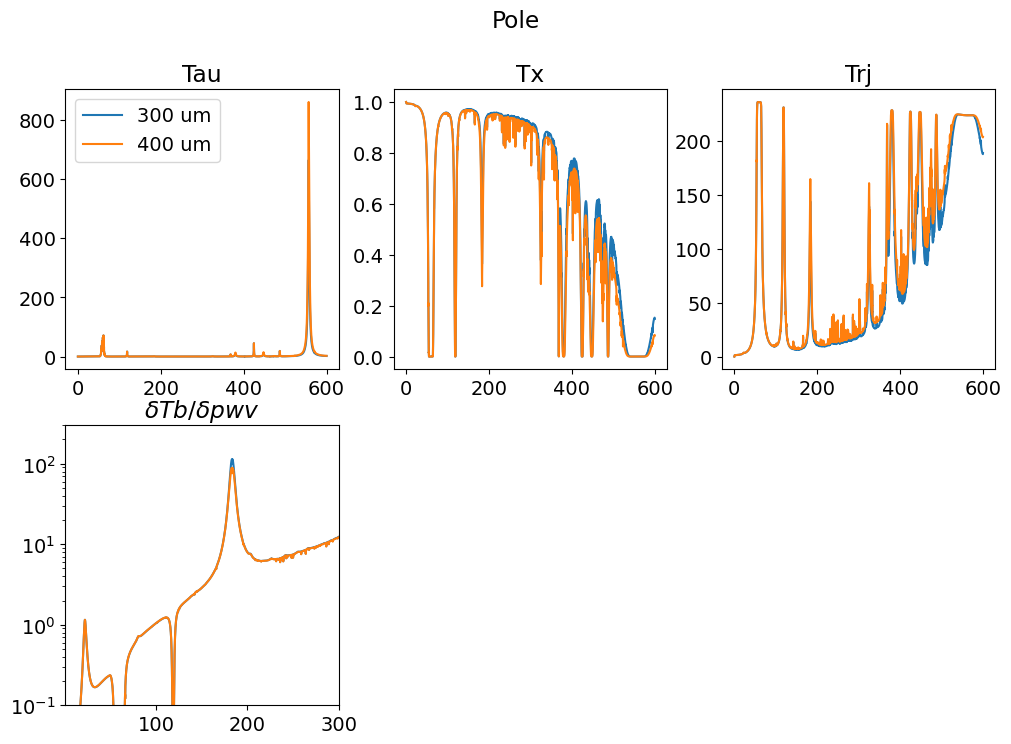

In [91]:
#Repeat for SPole
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 8]

#figure.set_constrained_layout_pads(w_pad=5 / 72, h_pad=2 / 72, hspace=0.5,
                               # wspace=1.0)

freq=sp300[0]

plt.subplot(2,3,1)
plt.plot(freq, sp300[1], label='300 um') #tau neper
plt.plot(freq, sp400[1], label='400 um')
plt.title('Tau')
plt.legend()

plt.subplot(2,3,2)
plt.plot(freq, sp300[2]) #transmittance
plt.plot(freq, sp400[2])
plt.title('Tx')

plt.subplot(2,3,3)
plt.plot(freq, sp300[3]) #trj K
plt.plot(freq, sp400[3])
plt.title('Trj')

plt.subplot(2,3,4)
plt.semilogy(freq, sp300[4]) # delta Tb / delta pwv (K/mm?)
plt.semilogy(freq, sp400[4])
plt.ylim(0.1, 300)
plt.xlim(1, 300)
plt.title('$\delta Tb/ \delta pwv$')
plt.suptitle('Pole')

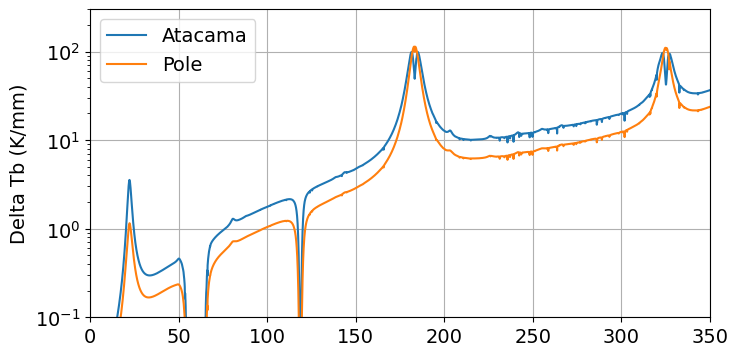

In [96]:
#reproducing a similar plot to the Atmos_pwv_flucts nb
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [8, 4]

# plot Tb differences between pwvs, which are 0.1mm pwv apart.

plt.semilogy(act_freq,a900[4],label='Atacama')
plt.semilogy(freq,sp300[4],label='Pole')
plt.ylabel('Delta Tb (K/mm)')
plt.legend()
plt.xlim(0,350)
plt.ylim(0.1,300)
plt.grid()

This plot is slightly different from the one produced in the other nb. Need to resolve what the $\delta pwv$ value is